<a href="https://colab.research.google.com/github/yejin-park/MachineLearning/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%5B%EC%A0%84%EC%B2%B4%5Dreview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<<<Sex칼럼이 결측치로 인식되는 이유를 알아야함>>> : 알 수 없는 데이터 오류

<<<자료형이 숫자형인 경우에만 학습이 가능>>> : map 활용
          
          train['Sex'] = train['Sex'].map({'male':0, 'female':1})


# 타이타닉 데이터를 활용한 데이터 분석

> 탑승자의 인적사항 정보에 따른 생존여부




## 1.라이브러리 및 데이터 (Library & Data)

In [170]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.linear_model import LogisticRegression #로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier #의사결정 나무 모델 불러오기

##pd.read_csv()
* csv파일 읽는 함수

In [171]:
# 데이터 불러오기
train = pd.read_csv('/content/titanic/train.csv')  #모델 학습 파일
test = pd.read_csv('/content/titanic/test.csv') # 모델 시험지 파일
submission = pd.read_csv('/content/titanic/submission.csv') # 답안지 파일

## 2. 탐색적 자료분석
Exploratory Data Analysis (EDA)

### pd.DateFrame.head()
### pd.DateFrame.tail()
### pd.DateFrame.shape #괄호없음


In [172]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [173]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [174]:
train.shape

(891, 12)

In [175]:
print(test.shape)
print(submission.shape)

(418, 11)
(418, 2)


##pd.DataFrame.info()

*   데이터셋의 칼럼별 정보를 알려줌
*   non-null은 몇 개인지
*   칼럼의 type은 무엇인지 int, float, object 드등



In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##pd.DataFrame.describe()
### #숫자형들의 기술 통계량 #이상치

### #count, mean, std, min, max  #25%(Q1) 아래부터~
### #이상치


In [177]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [178]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##pd.Series.value_counts()

*   series 내 고유값들 각각의 개수를 보여줌
*   가장 많이 나오는 고유값들 순서로 보여줌
*   비어 있는 값은 고려하지않음



## pd.DataFrame.describe() 의 경우 DataFrame
train.describe()
## Series : 전체 DataFrame에서 하나의 열 
train['Embarked'].value_counts()

In [179]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##pd.Series.unique()

*   해당 series의 고유값들만 보여줌
*   [1, 1, 1, 3]이라는 시리즈 중, unique() 함수 적용시 [1, 3]만 출력됨
*   nan값도 포함
*   출현하는 순서대로 나옴 (정렬X)


In [180]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

##pd.DataFrame.groupby()
*   집단에 대한 통계량 확인

In [181]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [182]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


#전처리

##pd.Series.plot(kind = "bar")

*   막대 그래프
*   index 값이 x축, value값이 y축으로 대응됨
*   value_counts()의 결과물을 보여줄 때 유용
*   groupby된 결과물을 보여줄 때 유용함



In [183]:
train.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [184]:
#type() 으로 Series인거 확인
type(train.groupby('Pclass').mean()['Survived'])

pandas.core.series.Series

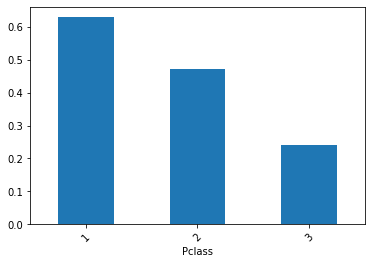

In [185]:
train.groupby('Pclass').mean()['Survived'].plot(kind = 'bar', rot=45)

##pd.Series.plot(kind='hist')

*   히스토그램 : 구간별로 속해있는 row의 개수를 시각화
*   수치형에서만 가능 / 범주는 안됨



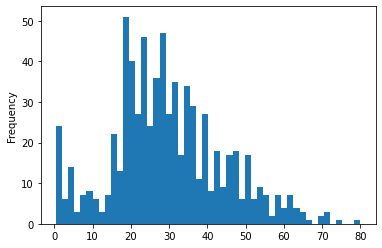

In [186]:
train['Age'].plot(kind='hist', bins = 50)
#bins 높일수록 구간 촘촘

* 보조선은 grid=True 를 통해 추가

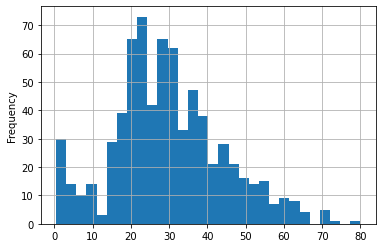

In [187]:
train['Age'].plot(kind='hist', bins = 30, grid = True)

##pd.DataFrame.plot(x,y,kind='scatter')
*   산점도 : 두 변수간의 관계를 시각화

In [188]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


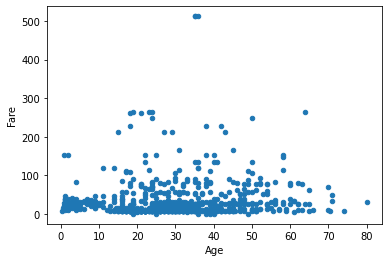

In [189]:
# 나이와 요금간의 관계
train.plot(x='Age', y='Fare', kind='scatter')

#3. 데이터 전처리 Data Cleansing & Pre-Processing


##pd.Series.isna()

*   결측치 여부를 확인
*   결측치면 True(1), 아니면 False(0)



In [190]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##pd.DataFrame.fillna()

*   결측치를 채우고자 하는 컬럼과 결측치를 대신하여 넣고자 하는 값을 명시해야함



In [191]:
train['Age'].median()

28.0

In [192]:
train['Age'] = train['Age'].fillna(28)
#train['Age'].fillna(28) 만 적으면 그냥 결측치에 28을 적은 것을 보여주기만 하지 저장은 X

In [193]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [194]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [195]:
# S라는 문자가 최빈
train['Embarked'] = train['Embarked'].fillna('S')

##pd.Series.map()

*   시리즈 내 값을 변환 할 때 사용하는 함수
*   모델은 숫자만 데이터로 인식함 문자를 모델링 하려고하면 오류발생



In [196]:
train['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [197]:
# 성별은 숫자가 아닌 문자로 male/female이 기재되어있음
# 숫자로 대체
train['Sex'] = train['Sex'].map({'male':0, 'female':1})


# 이 또한 train['Sex'].map({'male':0, 'female':1}) 만 하면 보여주기만하고 저장 X

In [198]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


성별이 0과 1로 대체되어있음

#4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling

X -> model -> Y

*   탑승자의 인적사항 정보
*   생존유무



In [199]:
X_train = train[['Sex', 'Pclass']] #학습
y_train = train[['Survived']]       #학습

In [200]:
test #성능 테스트

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [201]:
X_test = test[['Sex', 'Pclass']] #학습할 칼럼들만 테스트 데이터 셋에 설정

#근데 test 데이터 셋에서 성별은 수치화 되어있지않음

In [202]:
X_test

,Sex,Pclass
0,male,3
1,female,3
2,male,2
3,male,3
4,female,3
...,...,...
413,male,3
414,female,1
415,male,3
416,male,3


In [203]:
#성별 수치화
test['Sex'] = test['Sex'].map({'male':0, 'female':1})
#train['Sex'] = train['Sex'].map({'male':0, 'female':1}) 위에서 이미 변환

In [204]:
#수치화 한 것을 다시 대입
X_test = test[['Sex','Pclass']]
#X_train = train[['Sex', 'Pclass']] 위에서 이미 변환

In [205]:
X_test

,Sex,Pclass
0,0,3
1,1,3
2,0,2
3,0,3
4,1,3
...,...,...
413,0,3
414,1,1
415,0,3
416,0,3


##sklearn.linear_model.LofisticRegression()

*   로지스틱 회귀 모형
*   0과 1사이의 값을 산출



In [206]:
lr = LogisticRegression()

##sklearn.tree.DecisionTreeClassifier()

*   의사결정 나무 모델


In [207]:
dt = DecisionTreeClassifier()

#5. 모델 학습 및 검증 Model Tuning & Evaluation

###model.fit()
*   모델 학습



In [208]:
X_train

,Sex,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,1,3
889,0,1


In [209]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [210]:
lr.fit(X_train, y_train) #lr 로지스틱 회귀

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
dt.fit(X_train, y_train) #dt 의사결정 나무 모델

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###model.predict()

*   모델 예측



In [213]:
lr.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

그러나, submission제출 파일에 '생존확률'을 명시하라고 하고 있으므로 

0 과 1 사이에 실수값을 표현할 예정

###model.predict_proba()

*   모델 예측



In [216]:
#따라서 lr.predic(X_test) 가 아닌
lr.predict_proba(X_test)

array([[0.89797923, 0.10202077],
       [0.40645631, 0.59354369],
       [0.77524063, 0.22475937],
       [0.89797923, 0.10202077],
       [0.40645631, 0.59354369],
       [0.89797923, 0.10202077],
       [0.40645631, 0.59354369],
       [0.77524063, 0.22475937],
       [0.40645631, 0.59354369],
       [0.89797923, 0.10202077],
       [0.89797923, 0.10202077],
       [0.57476411, 0.42523589],
       [0.09515218, 0.90484782],
       [0.77524063, 0.22475937],
       [0.09515218, 0.90484782],
       [0.21157431, 0.78842569],
       [0.77524063, 0.22475937],
       [0.89797923, 0.10202077],
       [0.40645631, 0.59354369],
       [0.40645631, 0.59354369],
       [0.57476411, 0.42523589],
       [0.89797923, 0.10202077],
       [0.09515218, 0.90484782],
       [0.57476411, 0.42523589],
       [0.09515218, 0.90484782],
       [0.89797923, 0.10202077],
       [0.09515218, 0.90484782],
       [0.89797923, 0.10202077],
       [0.57476411, 0.42523589],
       [0.89797923, 0.10202077],
       [0.

In [217]:
lr.predict_proba(X_test).shape # 열이 두 개 (사망확률,생존확률)

(418, 2)

In [219]:
lr_pred = lr.predict_proba(X_test)[:,1] #0번째 1번째 중 1번째인 생존확률만

In [221]:
dt_pred =  dt.predict_proba(X_test)[:,1]

###pd.DataFrame.to_csv()
*    csv파일 저장

In [222]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [223]:
### 로지스틱 회귀로 구한 값을 옮겨적기 ###
submission['Survived'] = lr_pred
submission

,PassengerId,Survived
0,892,0.102021
1,893,0.593544
2,894,0.224759
3,895,0.102021
4,896,0.593544
...,...,...
413,1305,0.102021
414,1306,0.904848
415,1307,0.102021
416,1308,0.102021


In [225]:
#pd.DataFrame.to_csv()
submission.to_csv('logistic_regression_pred.csv', index = False)
#index = False를 명시하지않을 경우, 가장 첫번째 숫자가 포함됨

In [226]:
### 의사결정 트리로 구한 값을 옮겨적기 ###
submission['Survived'] = dt_pred
submission.to_csv('decision_tree_pred.csv', index=False)

decision tree : 0.78836

logistic regression : 0.78836 

동일함